In [130]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc29dbc70f0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [10]:
first_station = session.query(Station).first()
first_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc29dbc78d0>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [11]:
most_recent = session.query(Measurement.prcp, Measurement.station, Measurement.tobs, Measurement.date, Measurement.id).\
    order_by(Measurement.date.desc()).first()
most_recent

(0.0, 'USC00519397', 81.0, '2017-08-23', 2724)

In [12]:
most_recent = session.query(Measurement).order_by(Measurement.date.desc()).first()
most_recent.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc29dbc7ac8>,
 'tobs': 81.0,
 'date': '2017-08-23',
 'id': 2724,
 'prcp': 0.0,
 'station': 'USC00519397'}

In [13]:
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=366)

In [186]:
year_precip_avg = (session.query(Measurement.date,func.avg(Measurement.prcp))
           .filter(func.strftime('%Y-%m-%d',Measurement.date) > year_ago).group_by(Measurement.date).all())
year_precip_avg

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

In [187]:
#Sum Precip
year_precip_sum = (session.query(Measurement.date,func.sum(Measurement.prcp))
           .filter(func.strftime('%Y-%m-%d',Measurement.date) > year_ago).group_by(Measurement.date).all())
year_precip_sum

[('2016-08-23', 2.71),
 ('2016-08-24', 9.329999999999998),
 ('2016-08-25', 0.54),
 ('2016-08-26', 0.09999999999999999),
 ('2016-08-27', 0.31999999999999995),
 ('2016-08-28', 3.0999999999999996),
 ('2016-08-29', 1.46),
 ('2016-08-30', 0.07),
 ('2016-08-31', 3.1799999999999997),
 ('2016-09-01', 0.03),
 ('2016-09-02', 0.25),
 ('2016-09-03', 1.27),
 ('2016-09-04', 1.3800000000000001),
 ('2016-09-05', 0.33999999999999997),
 ('2016-09-06', 1.23),
 ('2016-09-07', 2.0),
 ('2016-09-08', 0.4600000000000001),
 ('2016-09-09', 1.0699999999999998),
 ('2016-09-10', 1.4),
 ('2016-09-11', 1.25),
 ('2016-09-12', 1.54),
 ('2016-09-13', 2.71),
 ('2016-09-14', 14.280000000000001),
 ('2016-09-15', 4.96),
 ('2016-09-16', 0.8200000000000001),
 ('2016-09-17', 0.6799999999999999),
 ('2016-09-18', 0.53),
 ('2016-09-19', 0.32),
 ('2016-09-20', 1.03),
 ('2016-09-21', 1.17),
 ('2016-09-22', 1.44),
 ('2016-09-23', 1.57),
 ('2016-09-24', 0.28),
 ('2016-09-25', 0.09),
 ('2016-09-26', 1.67),
 ('2016-09-27', 1.359999999

In [188]:
#Max Precip
year_precip_max =(session.query(Measurement.date,func.max(Measurement.prcp))
           .filter(func.strftime('%Y-%m-%d',Measurement.date) > year_ago).group_by(Measurement.date).all())
year_precip_max

[('2016-08-23', 1.79),
 ('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.

In [189]:
prec_df=pd.DataFrame(year_precip_max, columns=['Date', 'Precipitation'])
prec_df

,Date,Precipitation
0,2016-08-23,1.79
1,2016-08-24,2.28
2,2016-08-25,0.21
3,2016-08-26,0.04
4,2016-08-27,0.18
...,...,...
361,2017-08-19,0.09
362,2017-08-20,0.01
363,2017-08-21,0.56
364,2017-08-22,0.50


In [190]:
prec_df.set_index('Date',inplace=True)
prec_df

,Precipitation
Date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


In [191]:
prec_df.sort_values(by=["Date"], ascending=False)

,Precipitation
Date,
2017-08-23,0.45
2017-08-22,0.50
2017-08-21,0.56
2017-08-20,0.01
2017-08-19,0.09
...,...
2016-08-27,0.18
2016-08-26,0.04
2016-08-25,0.21


In [206]:
prec_df.describe()

,Precipitation
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


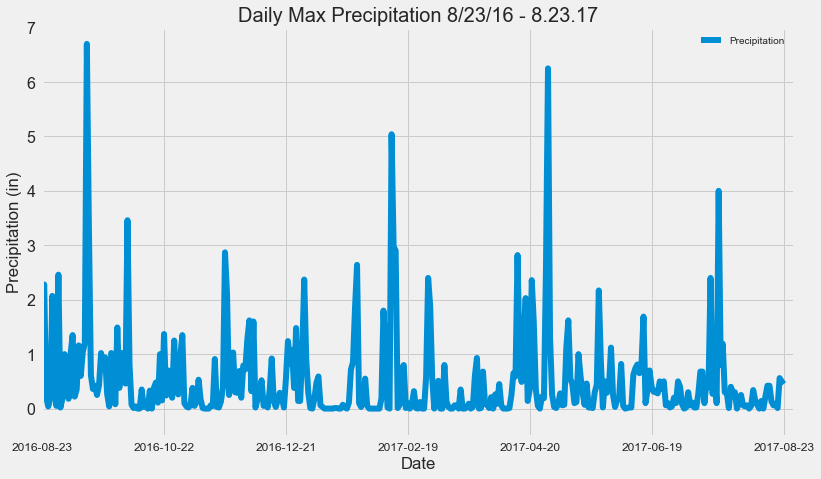

In [192]:
plt.rcParams['figure.figsize']=(12,7)
prec_df.plot(linewidth=6, xticks=(0,60,120,180,240,300,365))
plt.xlim(-0,370)
plt.ylim(-0.5,7)
plt.yticks(size=16)
plt.xticks(fontsize=12)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.title('Daily Max Precipitation 8/23/16 - 8.23.17',fontsize=20)
plt.show()

In [193]:
sum_prec=pd.DataFrame(year_precip_sum, columns=['Date', 'Precipitation'])
sum_prec.set_index('Date',inplace=True)
sum_prec

,Precipitation
Date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


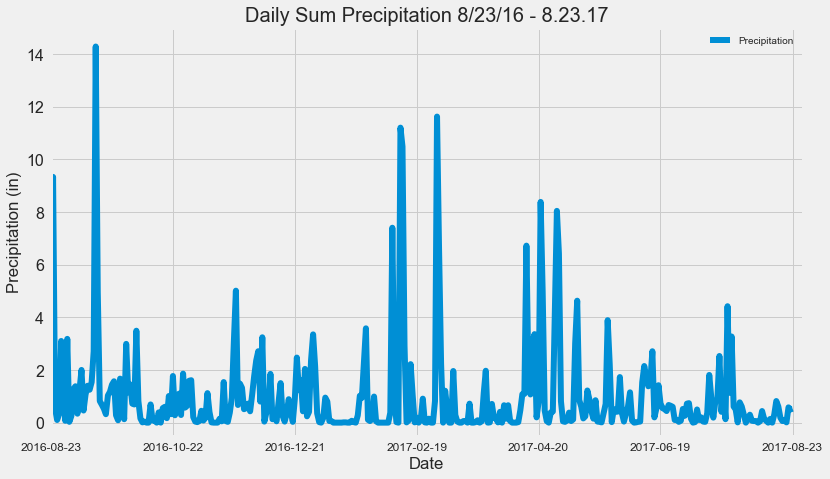

In [194]:
plt.rcParams['figure.figsize']=(12,7)
sum_prec.plot(linewidth=6, xticks=(0,60,120,180,240,300,365))
plt.xlim(-0,370)
plt.ylim(-0.5,15)
plt.yticks(size=16)
plt.xticks(fontsize=12)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.title('Daily Sum Precipitation 8/23/16 - 8.23.17',fontsize=20)
plt.show()

In [195]:
avg_prec=pd.DataFrame(year_precip_avg, columns=['Date', 'Precipitation'])
avg_prec.set_index('Date',inplace=True)
avg_prec

,Precipitation
Date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


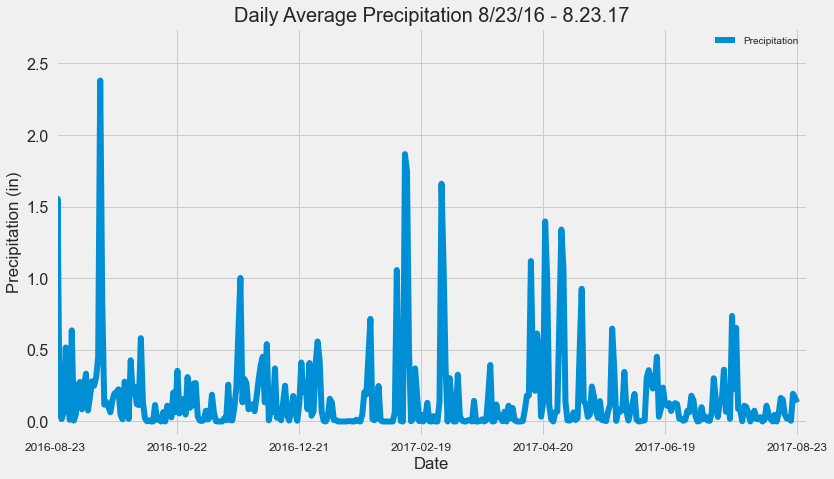

In [200]:
plt.rcParams['figure.figsize']=(12,7)
avg_prec.plot(linewidth=6, xticks=(0,60,120,180,240,300,365))
plt.xlim(-0,370)
plt.ylim(-0.1,2.75)
plt.yticks(size=16)
plt.xticks(fontsize=12)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.title('Daily Average Precipitation 8/23/16 - 8.23.17',fontsize=20)
plt.show()

In [203]:
year_precip = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date > year_ago).order_by(Measurement.date).all()

year_precip


[(0.0, '2016-08-23'),
 (0.15, '2016-08-23'),
 (0.05, '2016-08-23'),
 (None, '2016-08-23'),
 (0.02, '2016-08-23'),
 (1.79, '2016-08-23'),
 (0.7, '2016-08-23'),
 (0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),

In [207]:
year_precip_df = pd.DataFrame(year_precip, columns=["Precipitation", "Date"]).dropna()
year_precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [205]:
date_precip = precip_df.set_index(["Date"])
date_precip.sort_values(by=["Date"], ascending=False)

,Precipitation
Date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.50
...,...
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,1.79


In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(Station.station).count()
num_stations


9

In [41]:

stations = session.query(Station.station).all()
stations

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [43]:
stations_num = session.query(Station.station, Measurement.station).count()
stations_num

175950

In [ ]:
year_precp=(session.query(Measurement.date, func.max(Measurement.prcp))
           .filter(func.strftime('%Y-%m-%d',Measurement.date) > year_ago).group_by(Measurement.date).all())
year_precp

In [62]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = (session.query(Measurement.station, Measurement.id, func.count(Measurement.date)).group_by(Measurement.station).all())
active_stations_df = pd.DataFrame(active_stations, columns=["Station", "ID", "Date"])
active_stations_df

,Station,ID,Date
0,USC00511918,14960,1979
1,USC00513117,2725,2709
2,USC00514830,5434,2202
3,USC00516128,16939,2612
4,USC00517948,7636,1372
5,USC00518838,9008,511
6,USC00519281,12188,2772
7,USC00519397,1,2724
8,USC00519523,9519,2669


In [176]:
active_stations = (session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).all())
active_stations_df = pd.DataFrame(active_stations, columns=["Station", "TOBS"])
active_stations_df.sort_values(by=["TOBS"], ascending=False)

,Station,TOBS
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [87]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_temp = (session.query(Measurement.station, Measurement.date, Measurement.id, func.max(Measurement.tobs)).filter((Measurement.station)=="USC00519281").all())
top_temp

[('USC00519281', '2015-09-10', 14261, 85.0)]

In [170]:
low_temp = (session.query(Measurement.station, Measurement.date, Measurement.id, func.min(Measurement.tobs)).filter((Measurement.station)=="USC00519281").all())
low_temp

[('USC00519281', '2013-01-16', 13294, 54.0)]

In [172]:
avg_temp = (session.query(Measurement.station, Measurement.date, Measurement.id, func.avg(Measurement.tobs)).filter((Measurement.station)=="USC00519281").all())
avg_temp

[('USC00519281', '2010-01-01', 12188, 71.66378066378067)]

In [174]:
temps = (session.query(Measurement.station, Measurement.date, Measurement.tobs)).filter((Measurement.station)=="USC00519281").all()
temps_df = pd.DataFrame(temps, columns=["Station", "Date", "TOBS"]).dropna()
temps_df.sort_values(by=["TOBS"], ascending=True)

,Station,Date,TOBS
1106,USC00519281,2013-01-16,54.0
2223,USC00519281,2016-02-08,56.0
1866,USC00519281,2015-02-15,56.0
1892,USC00519281,2015-03-13,56.0
1825,USC00519281,2015-01-05,56.0
...,...,...,...
2765,USC00519281,2017-08-06,83.0
2019,USC00519281,2015-07-18,83.0
2068,USC00519281,2015-09-05,83.0
2072,USC00519281,2015-09-09,84.0


In [175]:
temps_df.describe()

,TOBS
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [158]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temps=(session.query(Measurement.date, Measurement.tobs)).filter((Measurement.station)=="USC00519281").filter(func.strftime('%Y-%m-%d',Measurement.date) > year_ago).group_by(Measurement.date).all()
year_temps

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [181]:
temps_df=pd.DataFrame(year_temps, columns=['Date', 'Temperature'])
temps_df = temps_df.set_index(["Date"])
temps_df

,Temperature
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


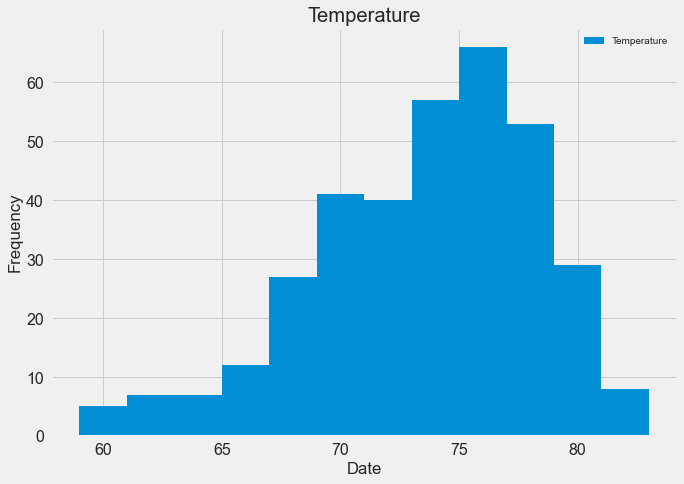

<Figure size 864x504 with 0 Axes>

In [185]:
temps_chart = temps_df.plot(kind='hist', bins=12, figsize=(10,7))

temps_chart.set_xlabel("Date")
temps_chart.set_ylabel("Frequency")
temps_chart.set_title("Temperature")
plt.yticks(size=16)
plt.xticks(fontsize=16)
plt.show()
plt.tight_layout()

# Close session

In [ ]:
# Close Session
session.close()